In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime

Les données proviennent de ce site :  https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

In [2]:
path = '/Users/maxime/Documents/dossier_python/data/marketing_campaign_fix.csv'

observations_mod = pd.read_csv(path)
observations_mod.set_index('ID', inplace=True)
observations_mod.head(6)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines
ID,,,,,,,,,
5524,1957,Graduation,Single,58138,0,0,04-09-2012,58,635
2174,1954,Graduation,Single,46344,1,1,08-03-2014,38,11
4141,1965,Graduation,Together,71613,0,0,21-08-2013,26,426
6182,1984,Graduation,Together,26646,1,0,10-02-2014,26,11
5324,1981,PhD,Married,58293,1,0,19-01-2014,94,173
7446,1967,Master,Together,62513,0,1,09-09-2013,16,520


In [3]:
observations_mod.shape

(2240, 9)

Nettoyage des données

In [4]:
obs = observations_mod
obs.loc[obs.Marital_Status == 'YOLO', 'Marital_Status']  = 'Absurd'
obs.loc[obs.Marital_Status == 'Alone', 'Marital_Status']  = 'Single'
len(obs)

2240

In [5]:
gb_edu = obs.groupby('Education').size()
sgb_edu = gb_edu.sort_values(ascending = True)
sgb_edu

Education
Basic           54
2n Cycle       203
Master         370
PhD            486
Graduation    1127
dtype: int64

In [6]:
df_edu = pd.DataFrame(sgb_edu, columns=['effectif'])
df_edu.reset_index(inplace=True)
df_edu

,Education,effectif
0,Basic,54
1,2n Cycle,203
2,Master,370
3,PhD,486
4,Graduation,1127


In [7]:
df_edu['code_edu'] = [1,3,4,5,2]
df_edu

,Education,effectif,code_edu
0,Basic,54,1
1,2n Cycle,203,3
2,Master,370,4
3,PhD,486,5
4,Graduation,1127,2


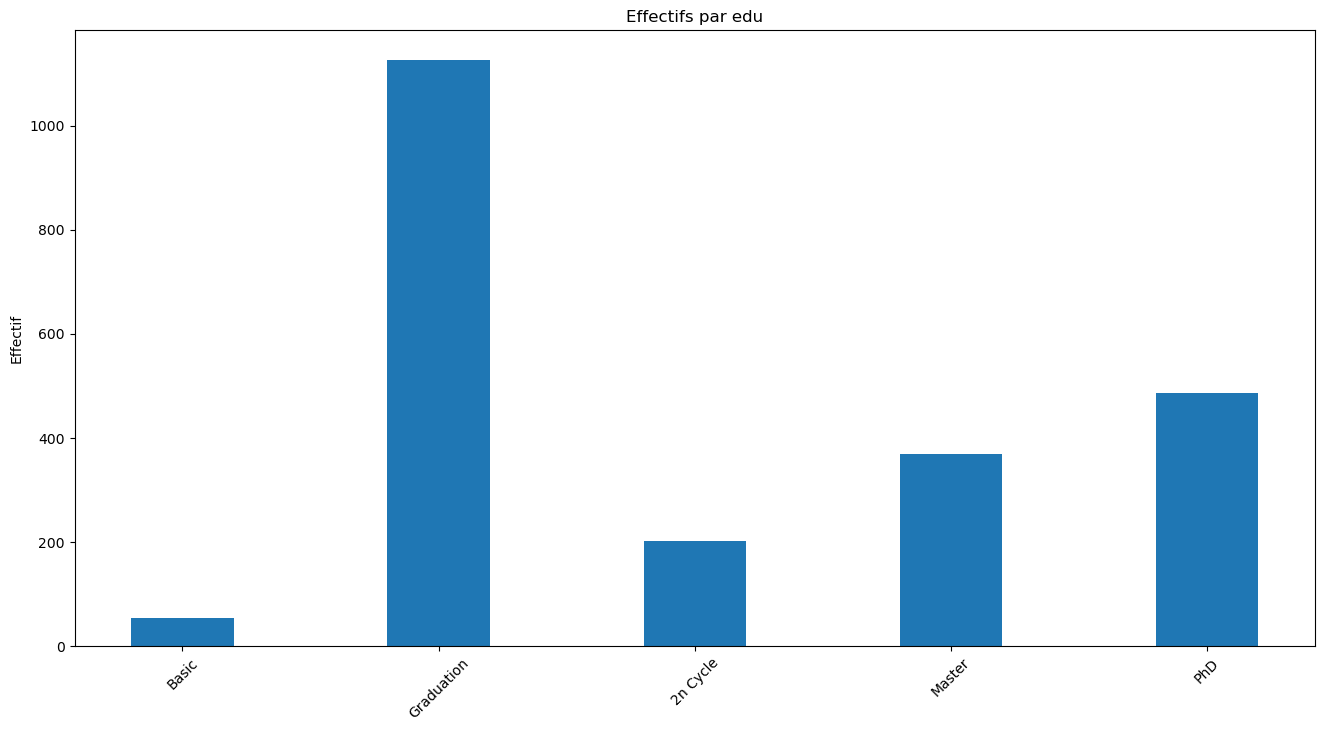

In [8]:
objects = [l for l in df_edu['Education']]
eff = [l for l in df_edu['effectif']]

objects = [l for l in df_edu.sort_values('code_edu')['Education']]
eff = [l for l in df_edu.sort_values('code_edu')['effectif']]


p1 = plt.bar(objects, eff, width=0.4)

#plt.xticks(l5Years)
plt.ylabel('Effectif')
plt.title('Effectifs par edu')
plt.gcf().set_size_inches(16, 8)
#plt.gca().axes.get_xaxis().set_visible(False)
# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
#plt.savefig('exported_pictures/effectifs_naissances_par_annee.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()

In [9]:
df_date = pd.DataFrame(obs['Dt_Customer'])
df_date.reset_index(inplace=True)
df_date

,ID,Dt_Customer
0,5524,04-09-2012
1,2174,08-03-2014
2,4141,21-08-2013
3,6182,10-02-2014
4,5324,19-01-2014
...,...,...
2235,10870,13-06-2013
2236,4001,10-06-2014
2237,7270,25-01-2014
2238,8235,24-01-2014


J'ai décidé de regrouper les dates par trimestre afin de gagner en lisibilité

In [10]:
#Je vais recoder les dates par trimestre afin de gagner en lisbilité
#codage des classes

df_date_class = df_date
df_date_class['Classes'] = None

i=0

for a in df_date_class['Dt_Customer']:
    date = datetime.strptime(a, '%d-%m-%Y')
    if date >= datetime.strptime('01-01-2012', '%d-%m-%Y') and date < datetime.strptime('01-04-2012', '%d-%m-%Y'):
        df_date_class.loc[i, 'Classes'] = 'T1_2012'
    elif date >= datetime.strptime('01-04-2012', '%d-%m-%Y') and date < datetime.strptime('01-07-2012', '%d-%m-%Y'):
        df_date_class.loc[i, 'Classes'] = 'T2_2012'
    elif date >= datetime.strptime('01-07-2012', '%d-%m-%Y') and date < datetime.strptime('01-10-2012', '%d-%m-%Y'):
        df_date_class.loc[i, 'Classes'] = 'T3_2012'
    elif date >= datetime.strptime('01-10-2012', '%d-%m-%Y') and date < datetime.strptime('01-12-2012', '%d-%m-%Y'):
        df_date_class.loc[i, 'Classes'] = 'T4_2012'
    elif date >= datetime.strptime('01-01-2013', '%d-%m-%Y') and date < datetime.strptime('01-04-2013', '%d-%m-%Y'):
        df_date_class.loc[i, 'Classes'] = 'T1_2013'
    elif date >= datetime.strptime('01-04-2013', '%d-%m-%Y') and date < datetime.strptime('01-07-2013', '%d-%m-%Y'):
        df_date_class.loc[i, 'Classes'] = 'T2_2013'
    elif date >= datetime.strptime('01-07-2013', '%d-%m-%Y') and date < datetime.strptime('01-10-2013', '%d-%m-%Y'):
        df_date_class.loc[i, 'Classes'] = 'T3_2013'
    elif date >= datetime.strptime('01-10-2013', '%d-%m-%Y') and date < datetime.strptime('01-12-2013', '%d-%m-%Y'):
        df_date_class.loc[i, 'Classes'] = 'T4_2013'
    elif date >= datetime.strptime('01-01-2014', '%d-%m-%Y') and date < datetime.strptime('01-04-2014', '%d-%m-%Y'):
        df_date_class.loc[i, 'Classes'] = 'T1_2014'
    elif date >= datetime.strptime('01-04-2014', '%d-%m-%Y') and date < datetime.strptime('01-07-2014', '%d-%m-%Y'):
        df_date_class.loc[i, 'Classes'] = 'T2_2014'
    elif date >= datetime.strptime('01-07-2014', '%d-%m-%Y') and date < datetime.strptime('01-10-2014', '%d-%m-%Y'):
        df_date_class.loc[i, 'Classes'] = 'T3_2014'
    elif date >= datetime.strptime('01-10-2014', '%d-%m-%Y') and date < datetime.strptime('01-12-2014', '%d-%m-%Y'):
        df_date_class.loc[i, 'Classes'] = 'T4_2014'
        
    i = i+1

df_date_class

,ID,Dt_Customer,Classes
0,5524,04-09-2012,T3_2012
1,2174,08-03-2014,T1_2014
2,4141,21-08-2013,T3_2013
3,6182,10-02-2014,T1_2014
4,5324,19-01-2014,T1_2014
...,...,...,...
2235,10870,13-06-2013,T2_2013
2236,4001,10-06-2014,T2_2014
2237,7270,25-01-2014,T1_2014
2238,8235,24-01-2014,T1_2014


In [11]:
gb_date_class = df_date_class.groupby('Classes').size()
sgb_date_class = gb_date_class.sort_values(ascending = True)
sgb_date_class

Classes
T4_2012    192
T4_2013    207
T3_2012    219
T1_2014    277
T2_2014    280
T2_2013    284
T3_2013    297
T1_2013    309
dtype: int64

In [15]:
df_date_class_ind = pd.DataFrame(sgb_date_class, columns=['effectif'])
df_date_class_ind.reset_index(inplace=True)
df_date_class_ind

,Classes,effectif
0,T4_2012,192
1,T4_2013,207
2,T3_2012,219
3,T1_2014,277
4,T2_2014,280
5,T2_2013,284
6,T3_2013,297
7,T1_2013,309


In [16]:
df_date_class_ind['code_date_class'] = [2,6,1,7,8,4,5,3]
df_date_class_ind

,Classes,effectif,code_date_class
0,T4_2012,192,2
1,T4_2013,207,6
2,T3_2012,219,1
3,T1_2014,277,7
4,T2_2014,280,8
5,T2_2013,284,4
6,T3_2013,297,5
7,T1_2013,309,3


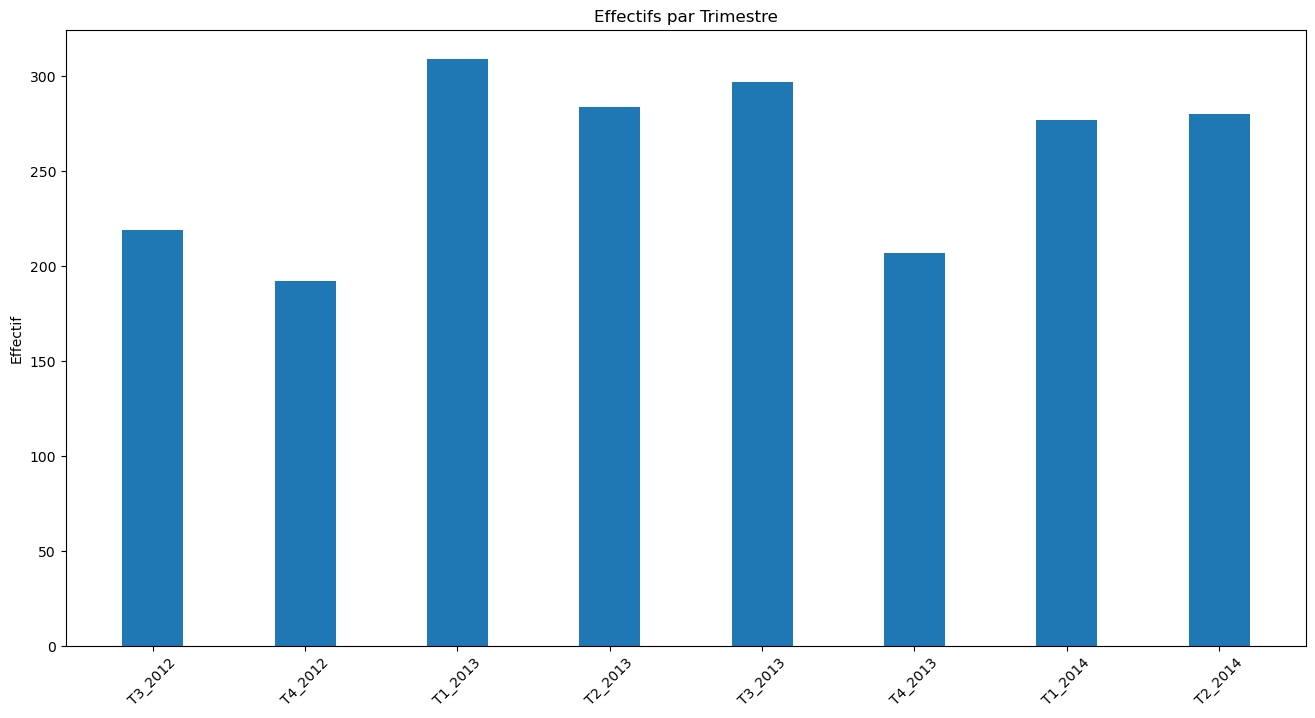

In [17]:
objects = [l for l in df_date_class_ind['Classes']]
eff = [l for l in df_date_class_ind['effectif']]

objects = [l for l in df_date_class_ind.sort_values('code_date_class')['Classes']]
eff = [l for l in df_date_class_ind.sort_values('code_date_class')['effectif']]


p1 = plt.bar(objects, eff, width=0.4)

#plt.xticks(l5Years)
plt.ylabel('Effectif')
plt.title('Effectifs par Trimestre')
plt.gcf().set_size_inches(16, 8)
#plt.gca().axes.get_xaxis().set_visible(False)
# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
#plt.savefig('exported_pictures/effectifs_naissances_par_annee.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()

In [18]:
gb_Marital_Status = obs.groupby('Marital_Status').size()
sgb_Marital_Status = gb_Marital_Status.sort_values(ascending = True)
sgb_Marital_Status

Marital_Status
Absurd        4
Widow        77
Divorced    232
Single      483
Together    580
Married     864
dtype: int64

In [19]:
df_Marital_Statuss = pd.DataFrame(sgb_Marital_Status, columns=['effectif'])
df_Marital_Statuss.reset_index(inplace=True)
df_Marital_Statuss

,Marital_Status,effectif
0,Absurd,4
1,Widow,77
2,Divorced,232
3,Single,483
4,Together,580
5,Married,864


In [20]:
df_Marital_Statuss['code_Marital_Status'] = [1,6,5,2,3,4]
df_Marital_Statuss

,Marital_Status,effectif,code_Marital_Status
0,Absurd,4,1
1,Widow,77,6
2,Divorced,232,5
3,Single,483,2
4,Together,580,3
5,Married,864,4


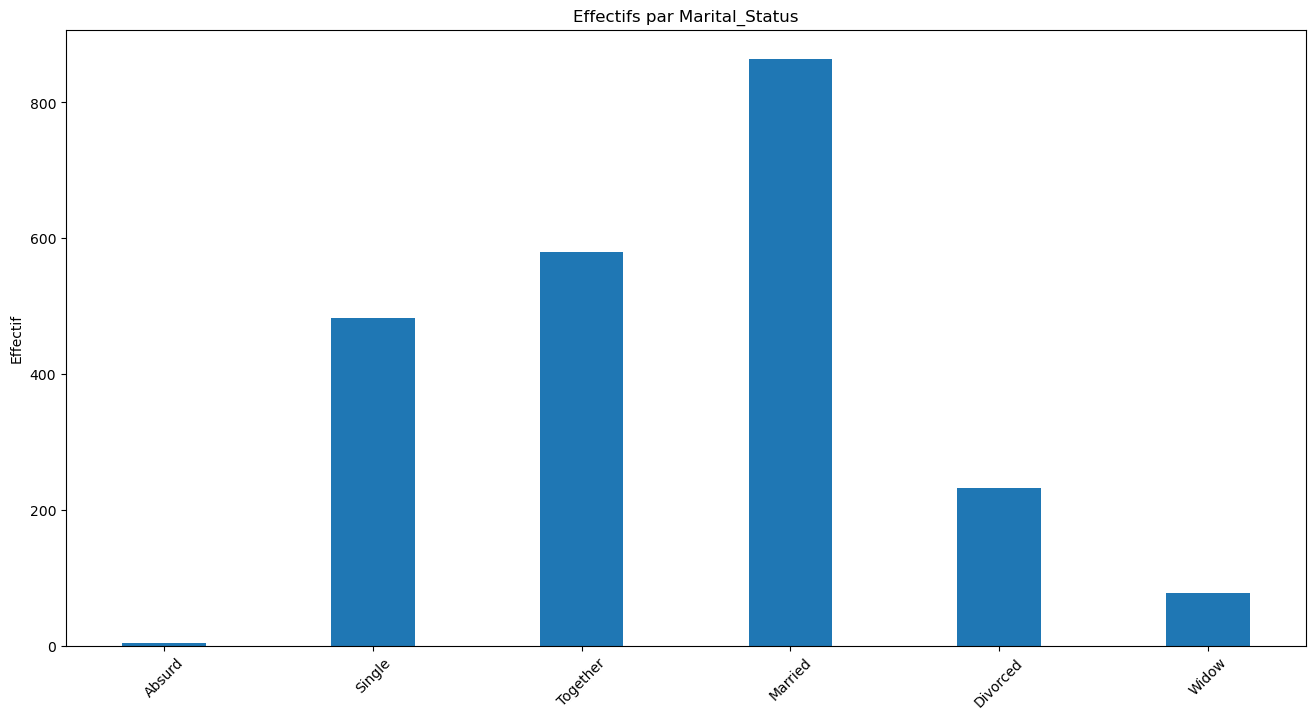

In [21]:
objects = [l for l in df_Marital_Statuss['Marital_Status']]
eff = [l for l in df_Marital_Statuss['effectif']]

objects = [l for l in df_Marital_Statuss.sort_values('code_Marital_Status')['Marital_Status']]
eff = [l for l in df_Marital_Statuss.sort_values('code_Marital_Status')['effectif']]


p1 = plt.bar(objects, eff, width=0.4)

#plt.xticks(l5Years)
plt.ylabel('Effectif')
plt.title('Effectifs par Marital_Status')
plt.gcf().set_size_inches(16, 8)
#plt.gca().axes.get_xaxis().set_visible(False)
# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
#plt.savefig('exported_pictures/effectifs_naissances_par_annee.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()

Comme le set de données ne contenait pas de variable qualitative ordonnée, j'ai donc modifié une variable quantitative pour la rendre qualitative.

In [22]:
#Avec ce set de donnes je manque de variable qualitative ordinales.
#Je vais donc modifier la variable quantitative 'Recency' en variable qualitative
    # -1 semaine = très récemment
    # -1 mois = récemment
    # -2 mois = il y a un moment
    # -3 mois = il y a quelque temps
    # -4 mois = il y a longtemps
    # +4 mois = il y a très longtemps

df_rec = pd.DataFrame(obs['Recency'])
df_rec.reset_index(inplace=True)
df_rec_class = df_rec
df_rec_class['Classes'] = None

i = 0

for a in df_rec['Recency']:
    if a <= 7:
        df_rec_class.loc[i, 'Classes'] = 'tres_recemment'
    elif a > 7 and a <= 30:
        df_rec_class.loc[i, 'Classes'] = 'recemment'
    elif a > 30 and a <= 60:
        df_rec_class.loc[i, 'Classes'] = 'il_y_a_un_moment'
    elif a > 60 and a <= 90:
        df_rec_class.loc[i, 'Classes'] = 'il_y_a_quelque_temps'
    elif a > 90 and a <= 120:
        df_rec_class.loc[i, 'Classes'] = 'il_y_a_longtemps'
    else:
        df_rec_class.loc[i, 'Classes'] = 'il_y_a_tres_longtemps'


    i = i + 1

df_rec_class

,ID,Recency,Classes
0,5524,58,il_y_a_un_moment
1,2174,38,il_y_a_un_moment
2,4141,26,recemment
3,6182,26,recemment
4,5324,94,il_y_a_longtemps
...,...,...,...
2235,10870,46,il_y_a_un_moment
2236,4001,56,il_y_a_un_moment
2237,7270,91,il_y_a_longtemps
2238,8235,8,recemment


In [23]:
gb_rec_class = df_rec_class.groupby('Classes').size()
sgb_rec_class = gb_rec_class.sort_values(ascending = False)
sgb_rec_class

Classes
il_y_a_quelque_temps    664
il_y_a_un_moment        654
recemment               540
il_y_a_longtemps        198
tres_recemment          184
dtype: int64

In [24]:
df_rec_class = pd.DataFrame(sgb_rec_class)
df_rec_class.reset_index(inplace=True)
df_rec_class.columns = ['lecture','effectif']
df_rec_class['code_lecture'] = [3,4,2,5,1]
df_rec_class

,lecture,effectif,code_lecture
0,il_y_a_quelque_temps,664,3
1,il_y_a_un_moment,654,4
2,recemment,540,2
3,il_y_a_longtemps,198,5
4,tres_recemment,184,1


In [25]:
df_rec_class.sort_values('code_lecture', inplace=True)
list(df_rec_class['lecture'])

['tres_recemment',
 'recemment',
 'il_y_a_quelque_temps',
 'il_y_a_un_moment',
 'il_y_a_longtemps']

In [26]:
df_rec_class['effectif_cumule'] = df_rec_class['effectif'].cumsum()
df_rec_class

,lecture,effectif,code_lecture,effectif_cumule
4,tres_recemment,184,1,184
2,recemment,540,2,724
0,il_y_a_quelque_temps,664,3,1388
1,il_y_a_un_moment,654,4,2042
3,il_y_a_longtemps,198,5,2240


In [27]:
df_rec_class['frequence'] = (100 * df_rec_class['effectif'] \
                                   / df_rec_class['effectif'].sum()).round(2)
df_rec_class

,lecture,effectif,code_lecture,effectif_cumule,frequence
4,tres_recemment,184,1,184,8.21
2,recemment,540,2,724,24.11
0,il_y_a_quelque_temps,664,3,1388,29.64
1,il_y_a_un_moment,654,4,2042,29.20
3,il_y_a_longtemps,198,5,2240,8.84


In [28]:

df_rec_class['frequence_cumulee'] = (100 * df_rec_class['effectif_cumule'] \
                                / df_rec_class['effectif'].sum()).round(2)
df_rec_class

,lecture,effectif,code_lecture,effectif_cumule,frequence,frequence_cumulee
4,tres_recemment,184,1,184,8.21,8.21
2,recemment,540,2,724,24.11,32.32
0,il_y_a_quelque_temps,664,3,1388,29.64,61.96
1,il_y_a_un_moment,654,4,2042,29.20,91.16
3,il_y_a_longtemps,198,5,2240,8.84,100.00


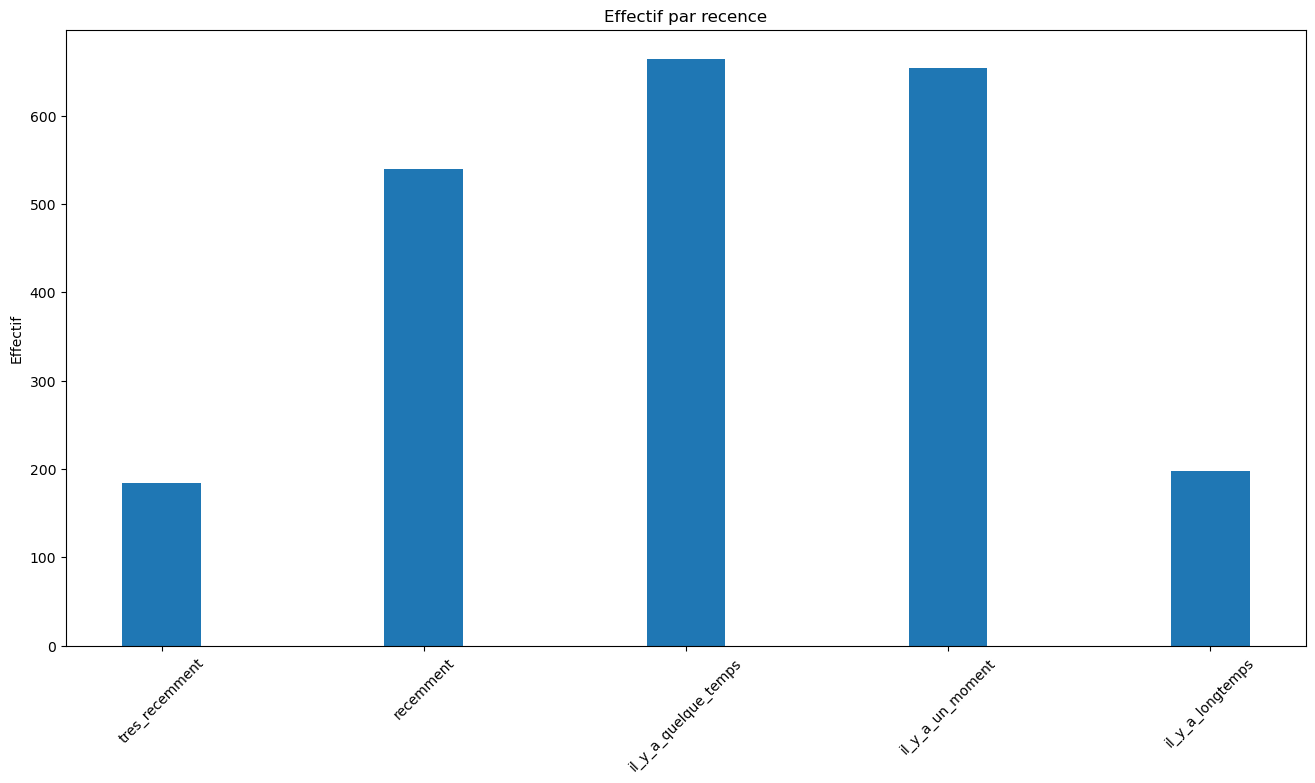

In [29]:
objects = [l for l in sgb_rec_class.index]
eff = [l for l in sgb_rec_class.values]


objects = [l for l in df_rec_class.sort_values('code_lecture')['lecture']]
eff = [l for l in df_rec_class.sort_values('code_lecture')['effectif']]

p1 = plt.bar(objects, eff, width=0.3)

#plt.xticks(l5Years)
plt.ylabel('Effectif')
plt.title('Effectif par recence')
plt.gcf().set_size_inches(16, 8)
#plt.gca().axes.get_xaxis().set_visible(False)
# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
#plt.savefig('exported_pictures/effectifs_naissances_par_annee.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()

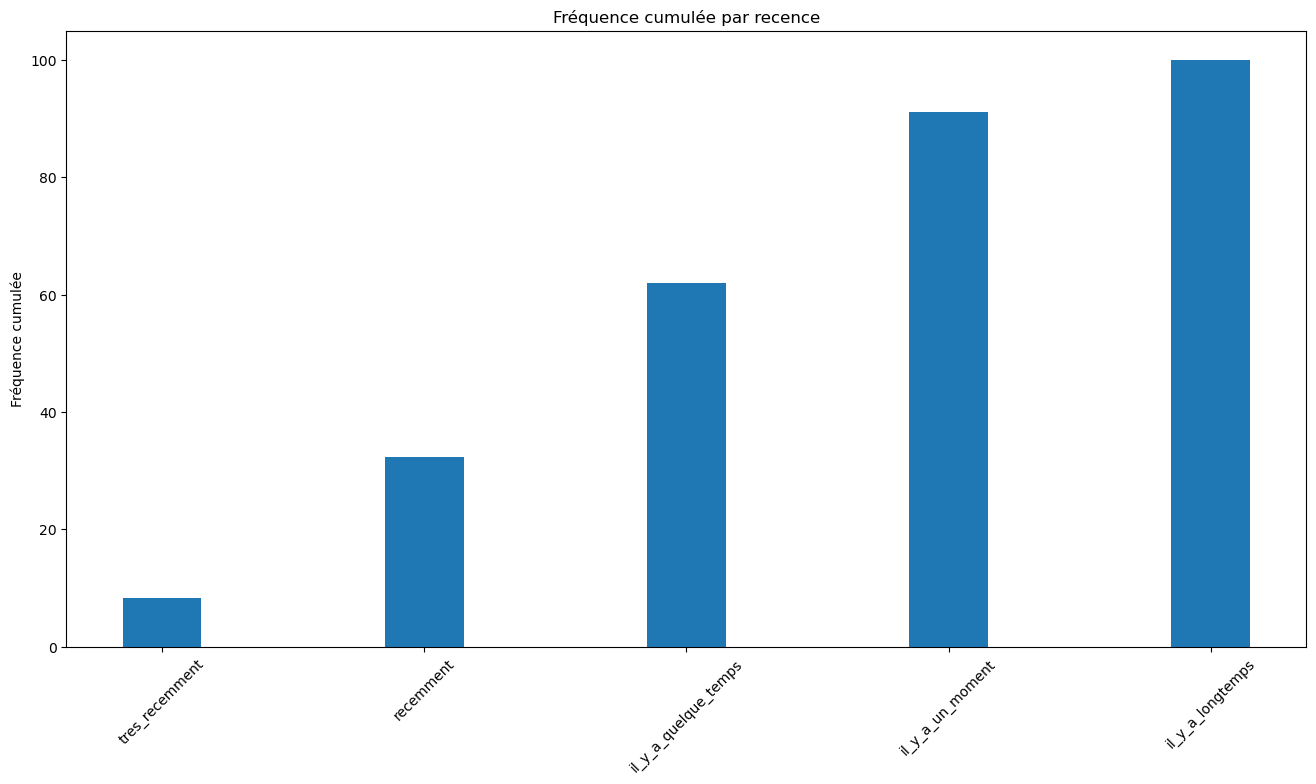

In [30]:
objects = [l for l in sgb_rec_class.index]
eff = [l for l in sgb_rec_class.values]


objects = [l for l in df_rec_class['lecture']]
eff = [l for l in df_rec_class['frequence_cumulee']]

p1 = plt.bar(objects, eff, width=0.3)

#plt.xticks(l5Years)
plt.ylabel('Fréquence cumulée')
plt.title('Fréquence cumulée par recence')
plt.gcf().set_size_inches(16, 8)
#plt.gca().axes.get_xaxis().set_visible(False)
# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
#plt.savefig('exported_pictures/effectifs_naissances_par_annee.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()

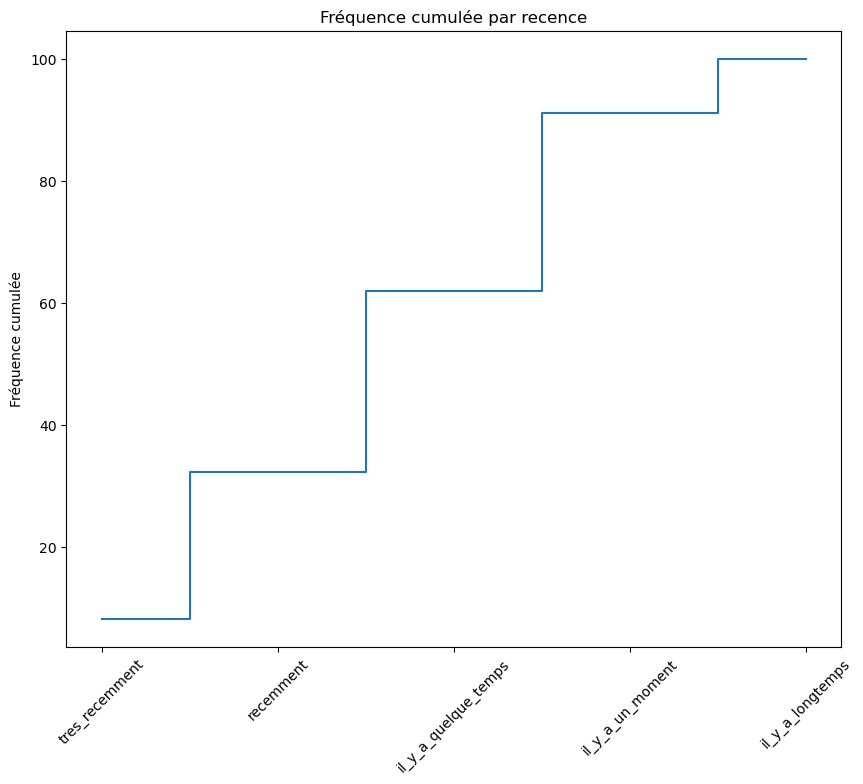

In [31]:
objects = [l for l in sgb_rec_class.index]
eff = [l for l in sgb_rec_class.values]


objects = [l for l in df_rec_class['lecture']]
eff = [l for l in df_rec_class['frequence_cumulee']]

p1 = plt.plot(objects, eff, drawstyle='steps-mid') # autre valeur: steps-post, steps

plt.ylabel('Fréquence cumulée')
plt.title('Fréquence cumulée par recence')
plt.gcf().set_size_inches(10, 8)
# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
#plt.savefig('exported_pictures/effectifs_naissances_par_annee.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()
